# Part 1: Data Loading and Preparation

In [13]:
import pandas as pd
import numpy as np
from sklearn import datasets

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
diabetes_data = datasets.load_diabetes()
df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)

df['target'] = diabetes_data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
print(diabetes_data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
# descriptive stats for features

descriptive_stats = df.describe()
skewness = df.skew()

descriptive_stats, skewness

(                age           sex           bmi            bp            s1  \
 count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
 mean  -3.634285e-16  1.308343e-16 -8.045349e-16  1.281655e-16 -8.835316e-17   
 std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
 min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
 25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
 50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
 75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
 max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   
 
                  s2            s3            s4            s5            s6  \
 count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
 mean   1.327024e-16 -4.574646e-16  3.777301e-16 -3.830854e-16 -3.412882e-16   
 std    4.761905e-02  4.761905e-02  4.

According to the dataset's description, the features are already standardized. The feature's skewness could indicate outliers that might need further attention.

The features mostly appear to be centered around zero.

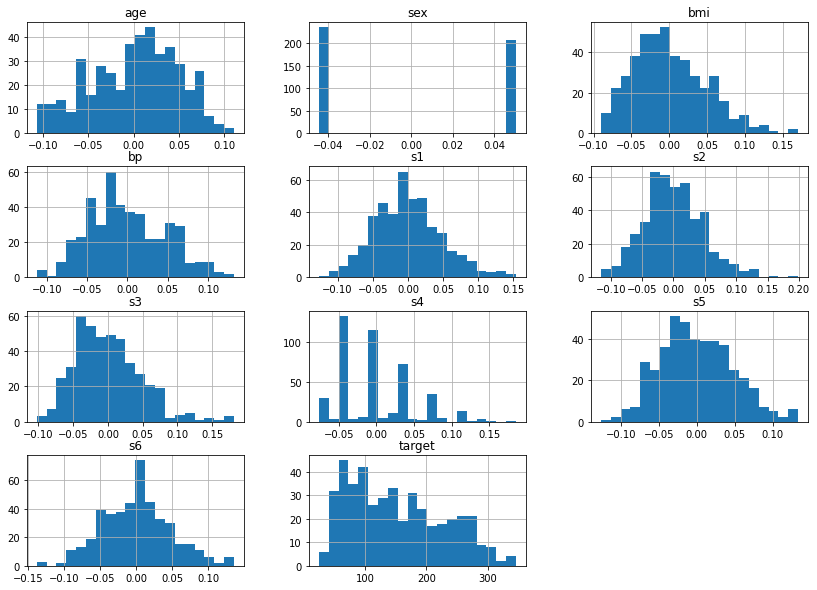

In [7]:
# histogram of features

df.hist(bins=20, figsize=(14, 10))
plt.show()

In [8]:
# correlation analysis
correlation_matrix = df.corr()

best_feature = correlation_matrix['target'].drop('target').idxmax()
best_feature, correlation_matrix['target'][best_feature]

('bmi', 0.5864501344746884)

BMI is the feature with the higest correlation to the target, disease progression, with a correlation coefficient of 0.59

In [10]:
# split data

X = df[[best_feature]]
y = df['target']

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=432)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 1), (89, 1), (353,), (89,))

# Part 2: Model Training

In [12]:
# linear regression model

model = LinearRegression()

# train model

model.fit(X_train, y_train)
model.coef_, model.intercept_

(array([973.59626695]), 152.7332148102659)

# Part 3: Prediction and Measurement

In [14]:
# feature coefficients

y_pred = model.predict(X_test)

#RMSE

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

slope = model.coef_[0]
intercept = model.intercept_

slope, intercept, rmse

(973.5962669464983, 152.7332148102659, 61.17752700287542)

The RMSE value is 61.18 which is the average error in predicting disease prediction using BMI. A perfect model has RMSE closer to 0, so this RMSE is relatively high - would be beneficial to use more than a single feature to predict disease prediction.

# Part 4: Visualization

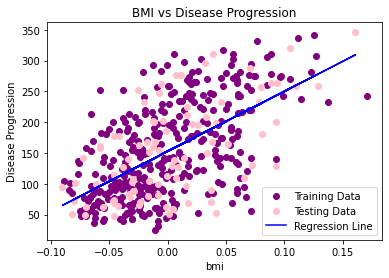

In [17]:
# training data
plt.scatter(X_train, y_train, color='purple', label='Training Data')

# testing data
plt.scatter(X_test, y_test, color='pink', label='Testing Data')

# regression line
plt.plot(X_test, y_pred, color='blue', label='Regression Line')

plt.xlabel(best_feature)  
plt.ylabel('Disease Progression')
plt.title(f'BMI vs Disease Progression')
plt.legend()
plt.show()